In [3]:
#-------------------------------------------------------------------------------
#                         GOOGLE DRIVE INTEGRATION
#-------------------------------------------------------------------------------

import os
from google.colab import drive

# Connect to Google Drive
drive.mount('/content/gdrive', force_remount=True)

# Verify the test/train files exists
os.listdir("/content/gdrive/My Drive/MSDS462/assignment1/data")


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


['fashion-mnist_test.csv', 'fashion-mnist_train.csv']

In [14]:
#-------------------------------------------------------------------------------
#                                   IMPORTS
#-------------------------------------------------------------------------------

import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import keras.models

from keras import models
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

#-------------------------------------------------------------------------------
#                                NOTEBOOK PARAMS
#-------------------------------------------------------------------------------

%matplotlib inline
warnings.filterwarnings("ignore")

#-------------------------------------------------------------------------------
#                                  VARIABLES
#-------------------------------------------------------------------------------

# Model variables
batch_size = 256
num_classes = 10
epochs = 50

#-------------------------------------------------------------------------------
#                                   START
#-------------------------------------------------------------------------------

# Read test/train data from Gdrive
data_train = pd.read_csv('/content/gdrive/My Drive/MSDS462/assignment1/data/fashion-mnist_train.csv')
data_test = pd.read_csv('/content/gdrive/My Drive/MSDS462/assignment1/data/fashion-mnist_test.csv')

# Specify input dimentions and get shape
img_rows, img_cols = 28, 28
input_shape = (img_rows, img_cols, 1)

# Test data
X = np.array(data_train.iloc[:, 1:])
y = to_categorical(np.array(data_train.iloc[:, 0]))

# Perform 80/20 split to generate validation datatset. Split here so data is
# shuffled (fit will pull the last 10% for validation if specified)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=13)

# Test data
X_test = np.array(data_test.iloc[:, 1:])
y_test = to_categorical(np.array(data_test.iloc[:, 0]))

# Normalize the data
X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
X_val = X_val.reshape(X_val.shape[0], img_rows, img_cols, 1)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_val = X_val.astype('float32')
X_train /= 255
X_test /= 255
X_val /= 255

# Build the model, compile and summarize 
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 kernel_initializer='he_normal',
                 input_shape=input_shape))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(Dropout(0.4))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])

model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
dropout_9 (Dropout)          (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
dropout_10 (Dropout)         (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 3, 3, 128)        

In [6]:
# Fit the model and evaluate
history = model.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_val, y_val))

score = model.evaluate(X_test, y_test, verbose=0)

# Show loss and accuracy using test data
print('\n[+] Test loss:', score[0])
print('[+] Test accuracy:', score[1])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 48000 samples, validate on 12000 samples
Epoch 1/50
48000/48000 [==============================] - 8s 176us/step - loss: 0.8678 - acc: 0.6715 - val_loss: 0.5544 - val_acc: 0.7987
Epoch 2/50
48000/48000 [==============================] - 2s 39us/step - loss: 0.5438 - acc: 0.7959 - val_loss: 0.4365 - val_acc: 0.8376
Epoch 3/50
48000/48000 [==============================] - 2s 39us/step - loss: 0.4599 - acc: 0.8308 - val_loss: 0.3858 - val_acc: 0.8552
Epoch 4/50
48000/48000 [==============================] - 2s 39us/step - loss: 0.4195 - acc: 0.8455 - val_loss: 0.3470 - val_acc: 0.8739
Epoch 5/50
48000/48000 [==============================] - 2s 39us/step - loss: 0.3828 - acc: 0.8582 - val_loss: 0.3329 - val_acc: 0.8748
Epoch 6/50
48000/48000 [==============================] - 2s 39us/step - loss: 0.3633 - acc: 0.8677 - val_loss: 0.3149 - val_acc: 0.8846
Epoch 7/50
48000/48000 [=========

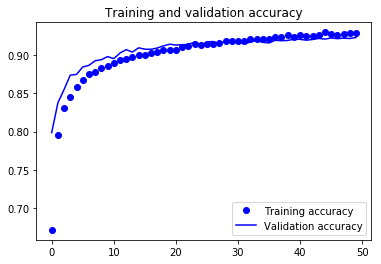

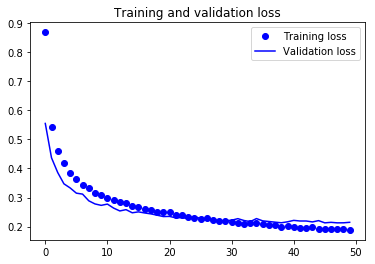

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:56: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return getattr(obj, method)(*args, **kwds)



[+] Classification Report:
              precision    recall  f1-score   support

     Class 0       0.86      0.90      0.88      1000
     Class 1       0.98      0.99      0.99      1000
     Class 2       0.89      0.90      0.90      1000
     Class 3       0.93      0.94      0.93      1000
     Class 4       0.92      0.88      0.90      1000
     Class 5       1.00      0.98      0.99      1000
     Class 6       0.79      0.77      0.78      1000
     Class 7       0.96      0.97      0.96      1000
     Class 8       0.98      0.99      0.98      1000
     Class 9       0.97      0.97      0.97      1000

    accuracy                           0.93     10000
   macro avg       0.93      0.93      0.93     10000
weighted avg       0.93      0.93      0.93     10000

[+] Correct:


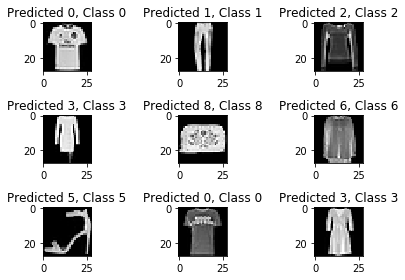


[+] Incorrect:


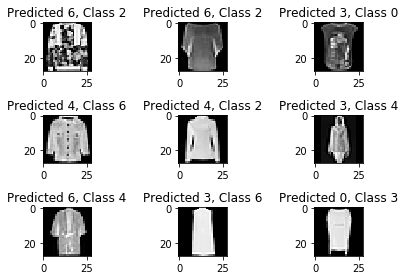

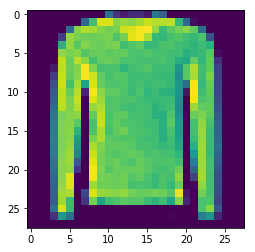

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:57: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("co..., outputs=[<tf.Tenso...)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:80: RuntimeWarning: invalid value encountered in true_divide


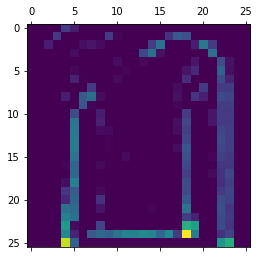

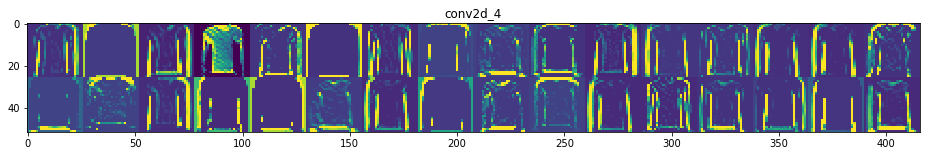

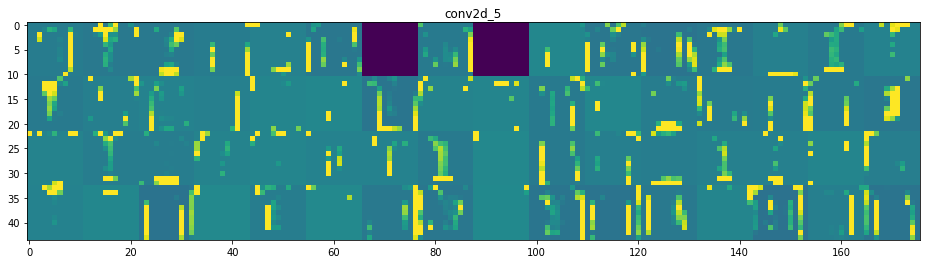

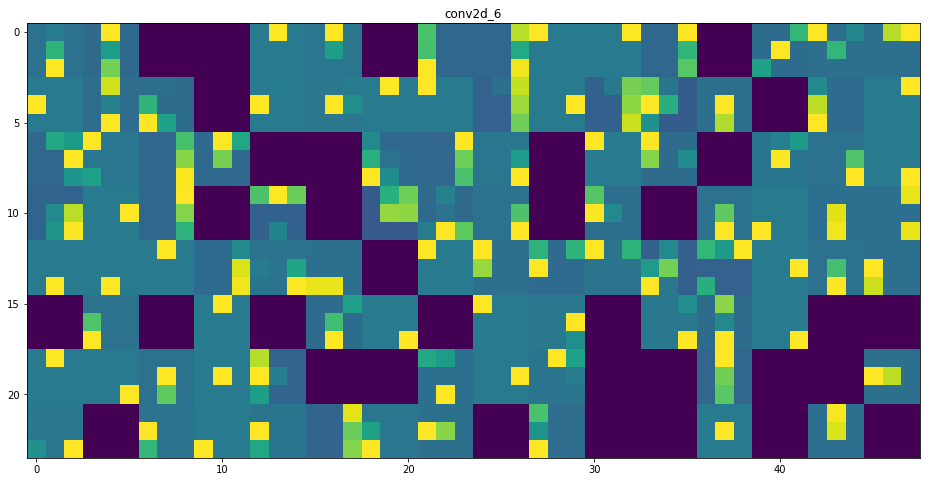

In [13]:
from keras import models


# Plot accuracy
accuracy = history.history['acc']
val_accuracy = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

# Get predictions from test data 
predicted_classes = model.predict_classes(X_test)

# Obtain indices for plots
y_true = data_test.iloc[:, 0]
correct = np.nonzero(predicted_classes==y_true)[0]
incorrect = np.nonzero(predicted_classes!=y_true)[0]

# Generate classification report
target_names = ["Class {}".format(i) for i in range(num_classes)]
print('\n[+] Classification Report:')
print(classification_report(y_true, predicted_classes, target_names=target_names))

print("[+] Correct:")
for i, correct in enumerate(correct[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[correct].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[correct], y_true[correct]))
    plt.tight_layout()

plt.show()

print("\n[+] Incorrect:")
for i, incorrect in enumerate(incorrect[0:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[incorrect].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[incorrect], y_true[incorrect]))
    plt.tight_layout()
plt.show()

# Show activations
test_im = X_train[154]
plt.imshow(test_im.reshape(28,28), cmap='viridis', interpolation='none')
plt.show()

layer_outputs = [layer.output for layer in model.layers[:8]]
activation_model = models.Model(input=model.input, output=layer_outputs)
activations = activation_model.predict(test_im.reshape(1,28,28,1))

first_layer_activation = activations[0]
plt.matshow(first_layer_activation[0, :, :, 4], cmap='viridis')

layer_names = []
for layer in model.layers[:-1]:
    layer_names.append(layer.name) 

images_per_row = 16

for layer_name, layer_activation in zip(layer_names, activations):
    # Look for convolutional layers
    if layer_name.startswith('conv'):
        n_features = layer_activation.shape[-1]
        size = layer_activation.shape[1]
        n_cols = n_features // images_per_row
        display_grid = np.zeros((size * n_cols, images_per_row * size))
        for col in range(n_cols):
            for row in range(images_per_row):
                channel_image = layer_activation[0,:, :, col * images_per_row + row]
                channel_image -= channel_image.mean()
                channel_image /= channel_image.std()
                channel_image *= 64
                channel_image += 128
                channel_image = np.clip(channel_image, 0, 255).astype('uint8')
                display_grid[col * size : (col + 1) * size,
                             row * size : (row + 1) * size] = channel_image
        scale = 1. / size
        plt.figure(figsize=(scale * display_grid.shape[1],
                            scale * display_grid.shape[0]))
        plt.title(layer_name)
        plt.grid(False)
        plt.imshow(display_grid, aspect='auto', cmap='viridis')

